In [1]:
%pylab inline
from ekstra_funktioner import *

from sklearn.datasets import make_blobs, make_moons

# Følgende sætter størrelsen af figurene (i tommer).
# Du kan prøve at ændre størrelsen, hvis figurene er for små eller for store.
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# $K$-means clustering

Der er andre måder, man kan beskrive sine data på, end blot ved at fitte end funktion til dem. Nogle gange vil man f.eks. gerne finde grupperinger eller klynger af data.

*$K$-means clustering* er en machine learning-metode, der netop prøver at finde klynger af datapunkter. Metoden er ret simpel, men virker ofte overraskende godt - faktisk er det ofte den metode, der bliver brugt, når f.eks. store virksomheder vil finde bestemte typer af kunder. Desværre er metoden ikke intelligent nok til at selv at finde det "rigtige" antal klynger, så det må man hjælpe den med selv. Når det er gjort, finder metoden til gengæld klyngerne alene.


# Opgave 1

Vi starter med at prøve at forstå, hvordan $K$-means clustering fungerer. Vi vil her bruge et kunstigt lavet datasæt:

In [2]:
# Generer data:
X, y = make_blobs(n_sampnles=100, cluster_std=3, random_state=42)

#Plot data:
scatter(X[:,0], X[:,1], s=25, c='gray', edgecolor=cm.gray(.95), lw=0.5)

TypeError: make_blobs() got an unexpected keyword argument 'n_sampnles'

Funktionen herunder forsøger at illustrere, hvordan $K$-means-algoritmen finder frem til klyngecentrene. Første argument til funktionen er datasættet, mens andet argument er antallet af klynger, man vil finde. Når du kører funktionen, vil du få mulighed for at gå frem og tilbage i iterationsprocessen og se, hvordan klyngerne langsomt finder sig til rette.

Du kan køre funktionen flere gange - hver gang vil klyngecentrene starte et nyt sted. Du kan også prøve at lave et nyt datasæt ved at ændre variablen `random_state` i forrige kodeblok (eller helt fjerne den).

### Opgave 1.1

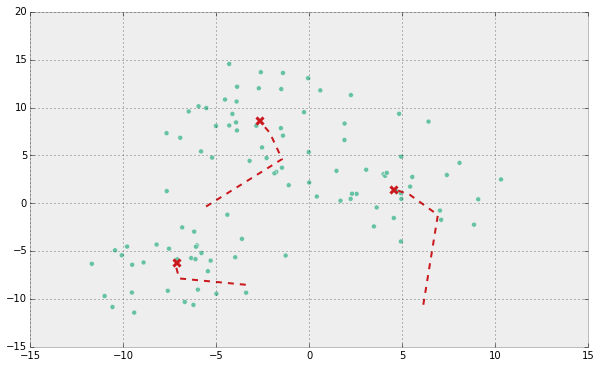

In [3]:
plot_interaktiv_Kmeans(X, klynger=3)

Leg med funktionen ovenfor indtil du har en god forståelse for, hvordan $K$-means clustering fungerer.

# Opgave 2

Vi vil nu kigge på et rigtigt dataset. Datasættet består af masserne og baneradierne for alle kendte exoplaneter (dvs. planeter om andre stjerner end Solen), hvor disse værdier er kendt.

Lad os først indlæse dataene og visualisere dem, så vi får et overblik. Hvert punkt i plottet svarer til en exoplanet.

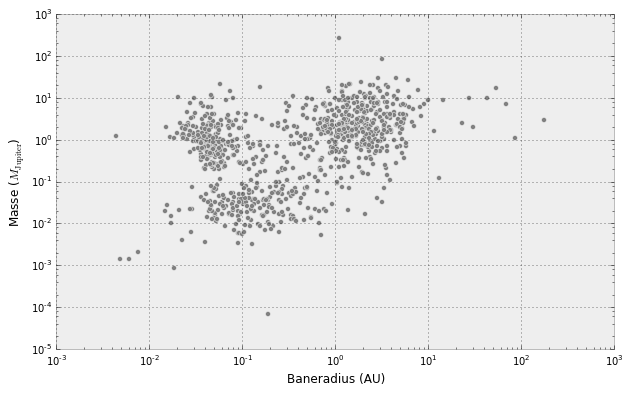

In [4]:
# Dataene indlæses:
planeter = pd.DataFrame.from_csv("data/exoplaneter.csv")

# Dataene plottes:
subplots()    # Figuren opsættes

xscale("log") # x-aksen sættes til logaritmisk visning
yscale("log") # y-aksen sættes til logaritmisk visning

scatter(planeter['semimajoraxis'],planeter['mass'], s=25, c='gray', edgecolor=cm.gray(.95), lw=0.5)

# Husk altid enheder på akserne! :)
xlabel("Baneradius (AU)")
ylabel(r"Masse ($M_{\mathrm{Jupiter}}$)")

### Opgave 2.1

*a)* Der ses nogle tydelige klynger i plottet ovenfor. Hvor mange mener du, der er?

*b)* Hvad tror du årsagen til disse klynger kan være? (Hint: overvej evt. hvad akserne viser.)

Angiv hvor mange klynger, du mener der er, herunder:

In [6]:
antal_klynger = 3

Lad os prøve at lave $K$-means clustering og se, hvad resultatet bliver:

In [7]:
kmeans = KMeans(n_clusters = antal_klynger)
kmeans.fit(np.log10(planeter[["semimajoraxis","mass"]])) # Vi tager logaritmen af dataværdierne 
                                                         # for at hjælpe algoritmen med at finde
                                                         # brugbare værdier. 
centre = 10**(kmeans.cluster_centers_)  # Her gemmes klyngecentrene.
klynger = kmeans.labels_                # Her gemmes informationen om, hvilken klynge de enkelte datapunkter tilhører.

$K$-means-algoritmen har nu fundet klyngecentrene. Vi kan visualisere resultatet ved at farve datapunkterne efter hvilken klynge, de tilhører. Dette er gjort herunder. De røde krydser angiver klyngecentrene.

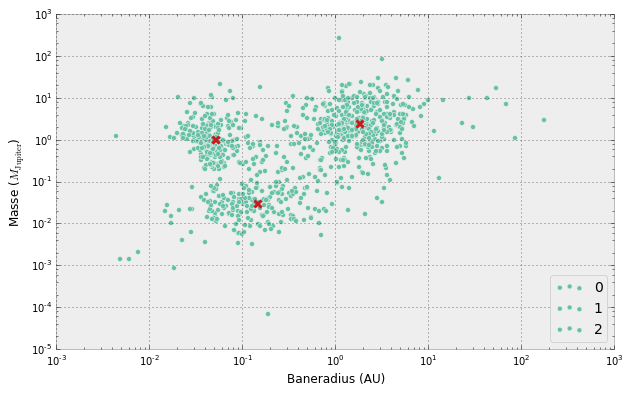

In [8]:
subplots()    # Figuren opsættes

xscale('log')
yscale('log')

# Vi plotter nu klyngerne en ad gangen, så de får forskellige farver.
for k in range(antal_klynger):
    p = planeter[klynger == k]
    sc = scatter(p['semimajoraxis'], p['mass'], 
                 s=25, label=k,
                 c=cm.Set2(k/7), edgecolor=cm.gray(.95), lw=.5, vmin=0, vmax=1)

# Klyngecentrene vises. Udkommenter de følgende to linjer, hvis du ikke vil se dem.
scatter(centre[:,0], centre[:,1], marker='x', s=50,
        linewidths=3, color=plt.cm.Reds(.75), zorder=15)

legend(loc='lower right', fontsize=14)

xlabel("Baneradius (AU)")
ylabel(r"Masse ($M_{\mathrm{Jupiter}}$)")

### Opgave 2.2

*a)* Passer klyngerne med dem, du selv havde forestillet dig?

Man bruger forskellige metoder til at detektere exoplaneter, f.eks. målinger af stjernens bevægelse eller ændringer i dens lysstyrke, når planeten bevæger sig ind foran den.

*b)* Hvordan passer denne information med din tidligere tolkning af klyngerne? Vil du ændre din tolkning på baggrund af denne nye information?

Man kunne forestille sig, at klyngerne indikerer, at planeterne er blevet opdaget med forskellige metoder, og at hver klynge kunne svare til en bestemt metode. Her til sidst kan vi prøve at kigge på hvilke metoder, planeterne rent faktisk blev opdaget med.

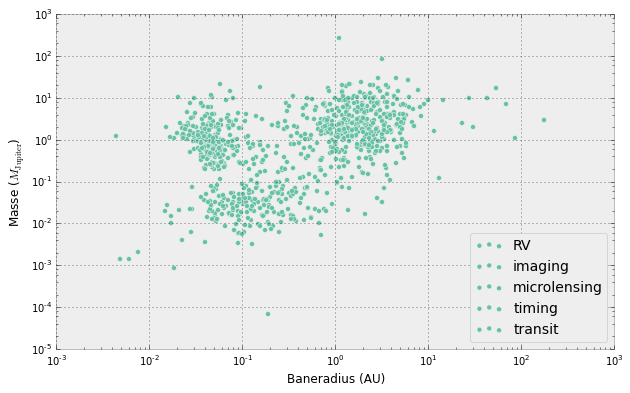

In [9]:
subplots()    # Figuren opsættes

xscale('log')
yscale('log')

# Plot datapunkterne med en farve, der svarer til deres opdagelsesmetode:
for i,m in enumerate(unique(planeter["method"].values)):
    p = planeter[planeter["method"] == m]
    sc = scatter(p['semimajoraxis'], p['mass'], 
                 s=25, label=m,
                 c=cm.Set2(i/7), edgecolor=cm.gray(.95), lw=.5, vmin=0, vmax=1)

legend(loc='lower right', fontsize=14)

xlabel("Baneradius (AU)")
ylabel(r"Masse ($M_{\mathrm{Jupiter}}$)")

### Opgave 2.3

I ovenstående plot kan vi se, at der planeterne er blevet opdaget med en ud af fem mulige metoder.

*a)* Hvordan passer dette med din tidligere tolkning af plottet?

*b)* Tror du, at man overhovedet kan få noget fornuftigt ud af at finde klynger i dette datasæt?

Moralen med opgaven kan derfor siges at være, at man skal passe *meget* på med at tolke på resultatet af en algoritme. Det er skræmmende let at se ting, som slet ikke er der. :)

# Opgave 3

Som et sidste, og lidt mere abstrakt, eksempel ser vi på et billede. Et digitalt billede består af pixels, som hver har tre tal-værdier, der indikerer farven af pixlen. De tre værdier går typisk fra 0 til og med 255 og angiver intensiteten af farverne rød, grøn og blå. 

Man kan derfor tænkte på en pixel som et punkt i et tredimensionalt rum, hvor akserne angiver intensiteten af rød, grøn og blå. Punktet vil da have koordinatsættet (rød, grøn, blå) eller, hvad man oftere bruger, $(r,g,b)$.

Et billede kan derfor repræsenteres ved en masse punkter i et sådant farve-rum. Hvis der er visse farver, der ofte går igen i lidt forskellige nuancer, forventer vi, at disse danner klynger i farverummet.

Lad os prøve at finde klynger i farverne i følgende billede:

In [ ]:
billede = Billede("http://th02.deviantart.net/fs71/PRE/f/2014/264/b/5/after_the_storm_by_joelbelessa-d801fsx.jpg")

# Hvis ovenstående linje ikke virker, kan du prøve nedenstående i stedet.
#billede = Billede("data/billede.png")

imshow(billede.billede)

Umiddelbart vil vi nok forvente at finde nogle klynger, der representerer grøn, blå og gul (som er en blanding af rød og grøn).

Lad os prøve at plotte de enkelte pixels' farver mod hinanden, så vi kan se hvordan farverne ligger fordelt. Da hver pixel består af tre farver (rød, grøn og blå), skal vi bruge et 3D-plot for at kunne vise punkterne. Dog har billedet så mange pixels, at computeren vil få svært ved at tegne dem, så vi plotter i stedet farvne mod hinanden med intensitetsplots (bemærk at farveskalaen er logaritmisk, da man ellers ikke ville kunne se farver, der kun tilhørte nogle få pixels).
Værdierne på akserne angiver hvor "mættet", farverne er. 0 betyder at farven slet ikke er der, mens 255 er fuldt mættet. Sort vil være $(r,g,b) = (0,0,0)$, mens hvid vil være $(r,g,b) = (255,255,255)$.

In [ ]:
plot_farver(billede)

### Opgave 3.1

Hvor mange klynger synes du, du kan se i de tre ovenstående plots?

Følgende kode vil lave en $K$-means clustering af det tre-dimensionelle farverum (dimensionerne er "rød", "grøn" og "blå") og derefter vise de fundne klyngecentre ved røde krydser.

Prøv at angive nogle forskellige antal klynger og se hvilke centre, metoden finder. (Computeren laver en hel del beregninger, så der kan godt gå nogle sekunder, før du ser noget).

In [ ]:
kmeans = kMeans(billede, antal_klynger=5)
plot_kMeans(billede, kmeans)

### Opgave 3.2

*a)* Giver de fundne klynger mening?

*b)* Har $K$-means-algoritmen fundet klynger, du ikke selv ville have udpeget?

Det er derfor vigtigt, at man er påpasselig med at tolke på resultatet fra $K$-means, idet algoritmen altid vil finde det antal klynger, vi har bedt den om, uanset om klyngerne er "reelle" eller ej.

### Bonusopgave

De fundne klynger representerer de mest gennemgående farver i billedet. Hvis vi derfor ændrer farven for hver enkelt pixel til farven af den klynge, pixlen ligger tættest på, vil effekten være at reducere antallet af farver i billedet. Nedenstående kode vil gøre lige præcis dette, og vise dig det resulterende billede. Prøv at teste med et forskelligt antal klynger.

In [ ]:
plot_reducerede_farver(billede, kmeans)

Prøv at sammenligne med det originale billede. Ligner de fundne farve-klynger virkelig de gennemgående farver i billedet?

# Opgave 4

Lad os kigge på det sidste datasæt, vi brugte i opgaverne om $k$ nearest neighbours. 

In [ ]:
X, y = make_moons(n_samples=300, noise=.15, random_state=11)

scatter(X[:,0], X[:,1], s=25, c=cm.Set2(y/7), edgecolor=cm.gray(.95), lw=0.5)

Der er en helt klar struktur i disse data, men spørgsmålet er, om $K$-means kan finde den? Lad os gentage proceduren fra opgave 2:

In [ ]:
antal_klynger = 2

kmeans = KMeans(n_clusters = antal_klynger)
kmeans.fit(X)

centre = kmeans.cluster_centers_ 
klynger = kmeans.labels_

In [ ]:
subplots()    # Figuren opsættes

# Vi plotter nu klyngerne en ad gangen, så de får forskellige farver.
for k in range(antal_klynger):
    x = X[klynger == k]
    scatter(x[:,0], x[:,1], s=25, label=k,
            c=cm.Set2(k/7), edgecolor=cm.gray(.95), lw=.5, vmin=0, vmax=1)

# Klyngecentrene vises. Udkommenter de følgende to linjer, hvis du ikke vil se dem.
scatter(centre[:,0], centre[:,1], marker='x', s=50,
        linewidths=3, color=plt.cm.Reds(.75), zorder=15)

legend(loc='lower right', fontsize=14)

### Opgave 4.1

$K$ means kan tydeligvis ikke finde de rigtige klynger i dette datasæt.

*a)* Kan du forklare, hvad der går galt? (Hint: tænk på, hvordan $K$-means bestemmer, hvilken klynge et givent datapunkt tilhører).

*b)* Kan du på baggrund af dit svar i *a)* komme med en tommelfingerregel om, i hvilke tilfælde $K$-means i hvert fald ikke vil virke særlig godt?

Ligesom i opgave 2 har vi altså her et eksempel på et datasæt, hvor $K$-means ikke fungerer særlig godt. Selv hvis vi ikke kendte de rigtige klasser i dette datasæt, ville vi nok kunne se en form for struktur alligevel, men et datasæt med så tydelig struktur i kun to dimensioner hører til sjældenhederne. Typisk arbejder man med data med langt flere variable, og man kan derfor ikke visualisere dem let. Lad os derfor til sidst minde os selv om, at man skal være meget forsigtig med at fortolke resultatet af en klyngeanalyse.